In [4]:
import pandas as pd
import matplotlib.pyplot as plt 


df = pd.read_csv('../data/processed data/master_spend_cleand_data.csv')



# What are the main spending categories ? 

In [6]:
# Group by Expense Type and sum the amount
expense_categories = df.groupby('Expense Type')['Amount'].sum().reset_index()

# Sort by amount descending
expense_categories = expense_categories.sort_values('Amount', ascending=False)

# Add percentage column
expense_categories['Percentage'] = (expense_categories['Amount'] / expense_categories['Amount'].sum() * 100).round(2)

expense_categories

,Expense Type,Amount,Percentage
22,Grant-in-aid To Arms Length Bodies,1.517236e+10,83.83
84,Res - Npf - Agencies - General Fund,1.027000e+09,5.67
66,R & D Current Grants To Private Sector - Npish,7.885410e+08,4.36
77,R & D Technical Advice/Services And Support,1.537068e+08,0.85
13,Current Grants To Central Government,1.506993e+08,0.83
...,...,...,...
65,R & D Current Grants To Overseas Bodies,3.459001e+04,0.00
26,Independent Experts,3.321700e+04,0.00
54,Pr & Marketing Advice & Services,3.096931e+04,0.00
39,Misc. Non Procurement Spend,3.000000e+04,0.00


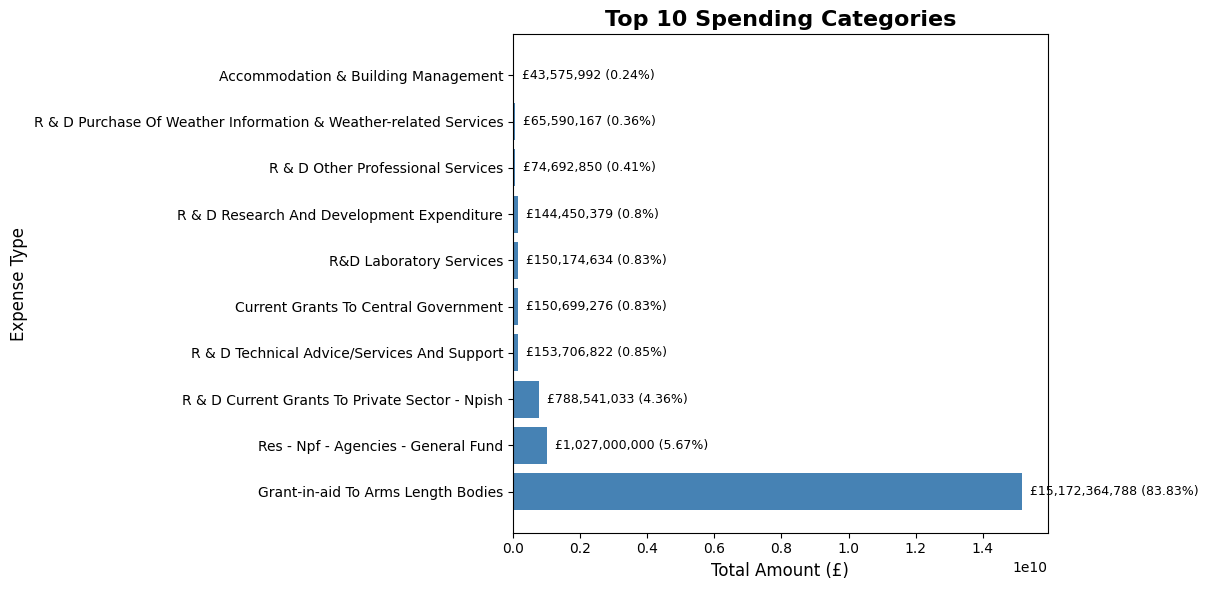

In [8]:

# Get top 10 only
top10_categories = expense_categories.head(10)

# Plot horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(top10_categories['Expense Type'], top10_categories['Amount'], color='steelblue')

# Add labels and title
plt.title('Top 10 Spending Categories', fontsize=16, fontweight='bold')
plt.xlabel('Total Amount (£)', fontsize=12)
plt.ylabel('Expense Type', fontsize=12)

# Add value labels on bars
for i, (amount, pct) in enumerate(zip(top10_categories['Amount'], top10_categories['Percentage'])):
    plt.text(amount, i, f'  £{amount:,.0f} ({pct}%)', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Which expense type costs the most?

In [3]:
# Find the most expensive expense type
most_expensive = expense_categories.iloc[0]

most_expensive

Expense Type    Grant-in-aid To Arms Length Bodies
Amount                          15172364788.389999
Percentage                                   83.83
Name: 22, dtype: object

 # How is the budget distributed across categories ?

In [9]:
# Show budget distribution across all categories
total_budget = df['Amount'].sum()

print(f"Total Budget: £{total_budget:,.2f}")
print(f"Total Categories: {len(expense_categories)}")
print("\nBudget Distribution:")
print(expense_categories[['Expense Type', 'Amount', 'Percentage']])

# Is it concentrated or distributed?
top3_percentage = expense_categories['Percentage'].head(3).sum()

print(f"\nTop 3 categories represent: {top3_percentage:.1f}% of total budget")

if top3_percentage > 70:
    print("✅ Budget is CONCENTRATED in few categories")
else:
    print("✅ Budget is DISTRIBUTED across many categories")


# ChatGPT is used to quick and write perfect prints and  write if it is concentrated or distributed? 

Total Budget: £18,097,912,376.53
Total Categories: 94

Budget Distribution:
                                      Expense Type        Amount  Percentage
22              Grant-in-aid To Arms Length Bodies  1.517236e+10       83.83
84             Res - Npf - Agencies - General Fund  1.027000e+09        5.67
66  R & D Current Grants To Private Sector - Npish  7.885410e+08        4.36
77     R & D Technical Advice/Services And Support  1.537068e+08        0.85
13            Current Grants To Central Government  1.506993e+08        0.83
..                                             ...           ...         ...
65         R & D Current Grants To Overseas Bodies  3.459001e+04        0.00
26                             Independent Experts  3.321700e+04        0.00
54                Pr & Marketing Advice & Services  3.096931e+04        0.00
39                     Misc. Non Procurement Spend  3.000000e+04        0.00
14              Current Grants To Local Government  2.980111e+04        0.00
